In [84]:
#librerías para el manejo de los datos
import pandas as pd
import numpy as np

#librerías para la visualización de los datos
import matplotlib.pyplot as plt
import seaborn as sns

#librerías para los análisis estadísticos
import scipy.stats as stats
from scipy.stats import chi2_contingency
from scipy.stats import skew

import pycountry_convert as pc

pd.options.display.max_columns=None
pd.options.display.max_rows=None

## Abrimos el DF:

In [85]:
df = pd.read_csv('../files/df_depurado.csv', index_col=0)
df.head()

,age,gender,country_q3,education_q4,role_q5,experience_q6,Q7,sector_q20,company_size_q21,anual_income_q25,continent,gender_def,annual_incom€_q25
0,50-54,Man,India,Bachelor’s degree,Other,5-10 years,"Python, R",Manufacturing/Fabrication,50-249 employees,"25,000-29,999",Asia,Man,"23,250-27,899"
1,50-54,Man,Indonesia,Master’s degree,Program/Project Manager,20+ years,"SQL, C, C++, Java",Manufacturing/Fabrication,"1000-9,999 employees","60,000-69,999",Asia,Man,"55,800-65,099"
2,22-24,Man,Pakistan,Master’s degree,Software Engineer,1-3 years,"Python, C++, Java",Academics/Education,"1000-9,999 employees",0-999,Asia,Man,"0-929,07"
3,45-49,Man,Mexico,Doctoral degree,Research Scientist,20+ years,Python,Academics/Education,"1000-9,999 employees","30,000-39,999",North America,Man,"27,900-37,199"
4,45-49,Man,India,Doctoral degree,Other,< 1 years,"Python, C, MATLAB",Academics/Education,50-249 employees,"30,000-39,999",Asia,Man,"27,900-37,199"


### Funciones de Chi Cuadrado y V de Crammer:

### Función de Chi Cuadrado:

In [86]:
#https://thinkingneuron.com/how-to-measure-the-correlation-between-two-categorical-variables-in-python/
def chi2(df): 
    chi2 = chi2_contingency(df)
    if chi2[1] <= .05:
        print(f"Existe una relación estadísticamente significativa en ambas variables, con una p de {round(chi2[1], 2)}")
    else:
        print(f"No existe una relación estadísticamente significativa en ambas variables, con una p de {round(chi2[1], 2)}")

### Función de V de Crammer:

In [87]:
#https://towardsdatascience.com/contingency-tables-chi-squared-and-cramers-v-ada4f93ec3fd
def cramers_v(cross_tabs):
    """
    Prints the degrees of freedom, effect size thresholds, and Cramer's V value.
    
    Args:
        cross_tabs: A crosstab dataframe.
    """
    
    # effect size data frame for cramer's v function
    data = cross_tabs
    sizes = pd.DataFrame(data, columns=['Degrees of Freedom', 'Small Effect', 'Medium Effect', 'Large Effect']) 
    
    # getting the chi sq. stat
    chi2 = stats.chi2_contingency(cross_tabs)[0]
    # calculating the total number of observations
    n = cross_tabs.sum().sum()
    # getting the degrees of freedom
    dof = min(cross_tabs.shape)-1
    # calculating cramer's v
    v = np.sqrt(chi2/(n*dof))
    # printing results
    
    if v <= 0.20:
              return print(f'La relación entre ambas variables es débil, siendo la V de Crammer = {round(v, 3)}')
    elif 0.20 < v <= 0.60:
              return print(f'La relación entre ambas variables es moderada, siendo la V de Crammer = {round(v, 3)}')
    elif v > 0.60:
              return print(f'La relación entre ambas variables es fuerte, siendo la V de Crammer = {round(v, 3)}')
          
    print(f'V = {v}')
    print(f'Cramer\'s V Degrees of Freedom = {dof}')
    print(f'\nEffect Size Thresholds\n{sizes}\n')

### Depuración de rol para pruebas:

In [111]:
def roles_rar (col):
    
    data = ['Data Scientist','Data Engineer', 'Business Analyst', 'Statistician']
    supervising_roles = ['Program/Project Manager', 'Product Manager',]
    soft_eng = ["Software Engineer", "DBA/Database Engineer"]
    relatios = ["Developer Relations/Advocacy"]
    nulos = ["Currently not employed", "Other"]
    student = ['Student']

    if col in data:
        return 'Data-related role'
    elif col in supervising_roles:
        return 'Supervising role'
    elif col in soft_eng:
        return 'Sofware-related role'
    elif col in relatios:
        return "Developer Relations/Advocacy"
    elif col in student:
        return 'Student'
    elif col in nulos:
        return np.nan


def respons (col):
    
    data = ['Data Scientist','Data Engineer', 'Business Analyst', 'Statistician']
    supervising_roles = ['Program/Project Manager', 'Product Manager']
    soft_eng = ["Software Engineer", "DBA/Database Engineer"]
    relatios = ["Developer Relations/Advocacy"]
    nulos = ["Currently not employed", "Other"]
    student = ['Student']

    if col in supervising_roles:
        return 'Supervisor'
    else:
        return 'Not supervisor'

#reemplazamos los valores en nuevas columnas:
df['role_q5_def'] = df['role_q5'].apply(roles_rar)
df['supervisor'] = df['role_q5'].apply(respons)

#creamos la tabla de contingencia:
respons_contig = pd.crosstab(df['age'], df['supervisor'])
respons_contig

chi2(respons_contig)
cramers_v(respons_contig)



Existe una relación estadísticamente significativa en ambas variables, con una p de 0.0
La relación entre ambas variables es moderada, siendo la V de Crammer = 0.203


In [112]:
gen_supervisor = pd.crosstab(df['gender_def'], df['supervisor'])
chi2(gen_supervisor)
cramers_v(gen_supervisor)

Existe una relación estadísticamente significativa en ambas variables, con una p de 0.0
La relación entre ambas variables es débil, siendo la V de Crammer = 0.04


# Tablas de contingencia:

## Género:

In [88]:
df.columns

Index(['age', 'gender', 'country_q3', 'education_q4', 'role_q5',
       'experience_q6', 'Q7', 'sector_q20', 'company_size_q21',
       'anual_income_q25', 'continent', 'gender_def', 'annual_incom€_q25'],
      dtype='object')

### Género y educación:

In [89]:
#https://stackoverflow.com/a/21247312
gen_ed = pd.crosstab(df['experience_q6'], df['gender_def'], margins=False)
gen_ed

gender_def,Man,NB,Woman
experience_q6,,,
1-3 years,6191,28,1565
10-20 years,1843,12,276
20+ years,1665,12,143
3-5 years,3259,30,720
5-10 years,2542,16,485
< 1 years,4366,25,1418
I have never written code,732,7,283


In [90]:
v_gen_ed = cramers_v(gen_ed)

La relación entre ambas variables es débil, siendo la V de Crammer = 0.088


In [91]:
chi2_gen_ed = chi2(gen_ed)
v_gen_ed = cramers_v(gen_ed)

Existe una relación estadísticamente significativa en ambas variables, con una p de 0.0
La relación entre ambas variables es débil, siendo la V de Crammer = 0.088


##### % verticales:

In [92]:
gen_ed_per = pd.crosstab(df['experience_q6'], df['gender_def'], margins=False).apply(lambda x: round(x/x.sum(), 2), axis=0)
gen_ed_per

gender_def,Man,NB,Woman
experience_q6,,,
1-3 years,0.30,0.22,0.32
10-20 years,0.09,0.09,0.06
20+ years,0.08,0.09,0.03
3-5 years,0.16,0.23,0.15
5-10 years,0.12,0.12,0.10
< 1 years,0.21,0.19,0.29
I have never written code,0.04,0.05,0.06


### Género y puesto:

In [93]:
#https://stackoverflow.com/a/21247312
gen_role = pd.crosstab(df['role_q5'], df['gender_def'], margins=False)
gen_role

gender_def,Man,NB,Woman
role_q5,,,
Business Analyst,779,4,175
Currently not employed,1479,15,463
DBA/Database Engineer,141,1,20
Data Analyst,1759,9,505
Data Engineer,561,2,98
Data Scientist,2971,16,584
Developer Relations/Advocacy,79,2,16
Machine Learning Engineer,1285,10,179
Other,1926,12,429


In [94]:
#calculamos si existe o no relación y el peso de ésta
chi2_gen_role = chi2(gen_role)
v_gen_role = cramers_v(gen_role)

Existe una relación estadísticamente significativa en ambas variables, con una p de 0.0
La relación entre ambas variables es débil, siendo la V de Crammer = 0.075


In [95]:
gen_role_per = gen_role.apply(lambda x: round(x/x.sum(), 2), axis=0)
gen_role_per

gender_def,Man,NB,Woman
role_q5,,,
Business Analyst,0.04,0.03,0.04
Currently not employed,0.07,0.12,0.09
DBA/Database Engineer,0.01,0.01,0.00
Data Analyst,0.09,0.07,0.10
Data Engineer,0.03,0.02,0.02
Data Scientist,0.14,0.12,0.12
Developer Relations/Advocacy,0.00,0.02,0.00
Machine Learning Engineer,0.06,0.08,0.04
Other,0.09,0.09,0.09


### Género y experiencia:

In [96]:
gen_exp = pd.crosstab(df['experience_q6'], df['gender_def'], margins=False)
gen_exp

gender_def,Man,NB,Woman
experience_q6,,,
1-3 years,6191,28,1565
10-20 years,1843,12,276
20+ years,1665,12,143
3-5 years,3259,30,720
5-10 years,2542,16,485
< 1 years,4366,25,1418
I have never written code,732,7,283


In [97]:
#calculamos si existe o no relación y el peso de ésta
chi2_gen_exp = chi2(gen_exp)
v_gen_exp= cramers_v(gen_exp)


Existe una relación estadísticamente significativa en ambas variables, con una p de 0.0
La relación entre ambas variables es débil, siendo la V de Crammer = 0.088


In [98]:
gen_exp_per = gen_exp.apply(lambda x: round(x/x.sum(), 2), axis=0)
gen_ed_per

gender_def,Man,NB,Woman
experience_q6,,,
1-3 years,0.30,0.22,0.32
10-20 years,0.09,0.09,0.06
20+ years,0.08,0.09,0.03
3-5 years,0.16,0.23,0.15
5-10 years,0.12,0.12,0.10
< 1 years,0.21,0.19,0.29
I have never written code,0.04,0.05,0.06


### Género y salario:

In [99]:
df.columns

Index(['age', 'gender', 'country_q3', 'education_q4', 'role_q5',
       'experience_q6', 'Q7', 'sector_q20', 'company_size_q21',
       'anual_income_q25', 'continent', 'gender_def', 'annual_incom€_q25'],
      dtype='object')

In [100]:
gen_sal = pd.crosstab(df['annual_incom€_q25'], df['gender_def'], margins=False)
gen_sal

gender_def,Man,NB,Woman
annual_incom€_q25,,,
"0-929,07",2520,13,775
"1,860-2,789",461,1,106
"116,250-139,499",337,1,36
"13,950-18,599",504,2,63
"139,500-185,999",334,3,47
"18,600-23,249",500,3,79
"186,000-232,499",160,0,15
"2,790-3,719",314,0,66
"23,250-27,899",383,1,79


In [101]:
chi2_gen_sal = chi2(gen_sal)
v_gen_sal = cramers_v(gen_sal)

Existe una relación estadísticamente significativa en ambas variables, con una p de 0.0
La relación entre ambas variables es débil, siendo la V de Crammer = 0.098


In [102]:
gen_sal_per = gen_sal.apply(lambda x: round(x/x.sum(), 2), axis=0)
gen_sal_per

gender_def,Man,NB,Woman
annual_incom€_q25,,,
"0-929,07",0.20,0.18,0.31
"1,860-2,789",0.04,0.01,0.04
"116,250-139,499",0.03,0.01,0.01
"13,950-18,599",0.04,0.03,0.03
"139,500-185,999",0.03,0.04,0.02
"18,600-23,249",0.04,0.04,0.03
"186,000-232,499",0.01,0.00,0.01
"2,790-3,719",0.02,0.00,0.03
"23,250-27,899",0.03,0.01,0.03


### Edad:

#### Género y edad:

In [103]:
df.columns

Index(['age', 'gender', 'country_q3', 'education_q4', 'role_q5',
       'experience_q6', 'Q7', 'sector_q20', 'company_size_q21',
       'anual_income_q25', 'continent', 'gender_def', 'annual_incom€_q25'],
      dtype='object')

In [104]:
gen_edad = pd.crosstab(df['age'], df['education_q4'], margins=False)
gen_edad

education_q4,Bachelor’s degree,Doctoral degree,I prefer not to answer,Master’s degree,No formal education past high school,Professional doctorate,Some college/university study without earning a bachelor’s degree
age,,,,,,,
18-21,3274,17,109,580,105,9,747
22-24,2295,101,83,1838,44,19,248
25-29,1716,367,110,2395,45,42,195
30-34,875,534,71,1682,64,60,121
35-39,567,504,59,1139,37,47,109
40-44,368,419,70,838,36,50,78
45-49,262,299,32,615,29,35,79
50-54,193,196,29,409,28,41,54
55-59,130,138,12,226,14,17,48


In [105]:
chi2_gen_edad = chi2(gen_edad)
v_gen_edad = cramers_v(gen_edad)

Existe una relación estadísticamente significativa en ambas variables, con una p de 0.0
La relación entre ambas variables es moderada, siendo la V de Crammer = 0.201


In [106]:
gen_edad_per = gen_edad.apply(lambda x: round(x/x.sum(), 2), axis=0)
gen_ed_per

gender_def,Man,NB,Woman
experience_q6,,,
1-3 years,0.30,0.22,0.32
10-20 years,0.09,0.09,0.06
20+ years,0.08,0.09,0.03
3-5 years,0.16,0.23,0.15
5-10 years,0.12,0.12,0.10
< 1 years,0.21,0.19,0.29
I have never written code,0.04,0.05,0.06


#### Edad y educación:

In [107]:
edad_educ = pd.crosstab(df['education_q4'], df['age'], margins=False)
edad_educ

age,18-21,22-24,25-29,30-34,35-39,40-44,45-49,50-54,55-59,60-69,70+
education_q4,,,,,,,,,,,
Bachelor’s degree,3274,2295,1716,875,567,368,262,193,130,117,19
Doctoral degree,17,101,367,534,504,419,299,196,138,134,42
I prefer not to answer,109,83,110,71,59,70,32,29,12,14,2
Master’s degree,580,1838,2395,1682,1139,838,615,409,226,218,41
No formal education past high school,105,44,45,64,37,36,29,28,14,6,4
Professional doctorate,9,19,42,60,47,50,35,41,17,24,10
Some college/university study without earning a bachelor’s degree,747,248,195,121,109,78,79,54,48,30,4


In [108]:
chi2_edu_edad = chi2(edad_educ)
v_edu_edad= cramers_v(edad_educ)

Existe una relación estadísticamente significativa en ambas variables, con una p de 0.0
La relación entre ambas variables es moderada, siendo la V de Crammer = 0.201


#### Edad y experiencia:

In [109]:
edad_exp = pd.crosstab(df['experience_q6'], df['age'],margins=False)
edad_exp

age,18-21,22-24,25-29,30-34,35-39,40-44,45-49,50-54,55-59,60-69,70+
experience_q6,,,,,,,,,,,
1-3 years,2350,1983,1565,736,464,295,171,117,58,36,9
10-20 years,14,18,95,354,593,508,260,149,60,62,18
20+ years,5,5,5,11,91,245,411,388,287,298,74
3-5 years,604,981,1080,588,290,201,116,57,51,34,7
5-10 years,156,255,708,858,456,252,172,91,41,47,7
< 1 years,1622,1276,1213,667,422,267,146,97,55,41,3
I have never written code,90,110,204,193,146,91,75,51,33,25,4


In [110]:
chi2(edad_exp)
cramers_v(edad_exp)

Existe una relación estadísticamente significativa en ambas variables, con una p de 0.0
La relación entre ambas variables es moderada, siendo la V de Crammer = 0.306


## Representación gráfica:

### Género y edad:

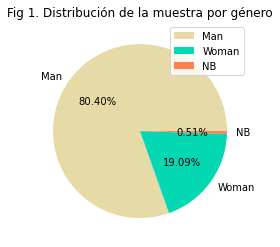

In [159]:
gender2 = df['gender_def'].value_counts()

plt.figure()
plt.pie(gender2.values, labels=gender2.index, autopct='%1.2f%%', colors=['#E6DAA6','#04D8B2','#FF7F50'])
plt.legend(gender2.index)
plt.title('Fig 1. Distribución de la muestra por género')
plt.savefig('../graphs/gender-distrib.png')
plt.show();

## País:

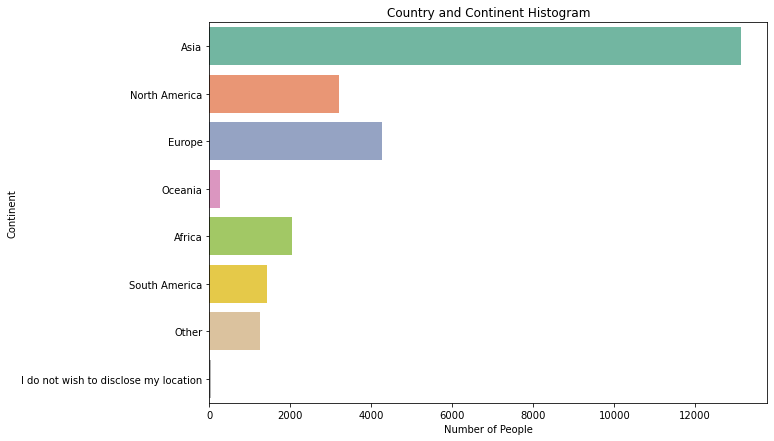

In [155]:
plt.figure(figsize=(10,7))
fig=sns.countplot(y='continent', data=df, palette='Set2') #hue='gender_def'
#podriamos poner hue='country, pero quedan barras muy finas y una leyenda demasiado extensa.

fig.set(ylabel='Continent',xlabel='Number of People')
fig.set_title('Country and Continent Histogram')
#plt.xticks(rotation = 90)
plt.savefig('../graphs/country-distrib.png', transparent=True)
plt.show()

### Género y país:

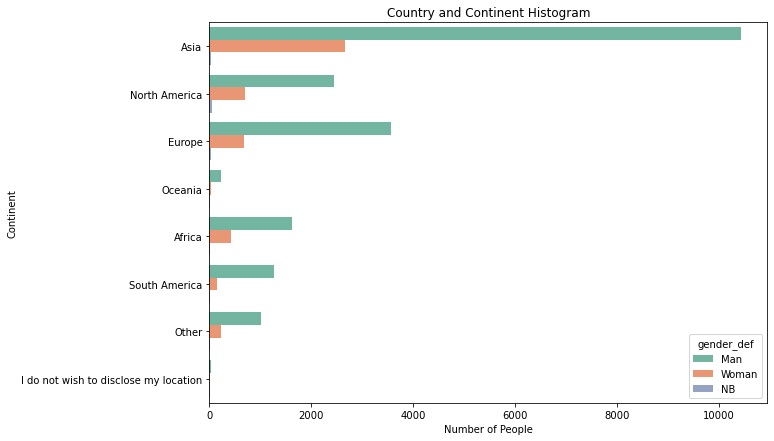

In [156]:
plt.figure(figsize=(10,7))
fig=sns.countplot(y='continent', data=df, palette='Set2', hue='gender_def')
#podriamos poner hue='country, pero quedan barras muy finas y una leyenda demasiado extensa.

fig.set(ylabel='Continent',xlabel='Number of People')
fig.set_title('Country and Continent Histogram')
#plt.xticks(rotation = 90)
plt.savefig('../graphs/gen-country.png', transparent=True)
plt.show()